In [29]:
# Dependencies
import csv
import sys
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import matplotlib.dates as mdates
import scipy.stats as st
from pprint import pprint
from datetime import datetime


In [30]:
# Import the covid-19 dataset 
csv_path = ('Resources/owid-covid-data_updated_main.csv')
covid_data_df = pd.read_csv(csv_path)
covid_data_df.head(1000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.0,0.0,0.000,0.00,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,OWID_KOS,Europe,Kosovo,9/28/2020,15472,47,58.429,622,3,1.286,...,9795.834,0.6,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000
203,YEM,Asia,Yemen,9/28/2020,2034,1,0.571,588,0,0.286,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452
204,ZAF,Africa,South Africa,9/28/2020,670766,1268,1365.000,16398,22,63.571,...,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699
205,ZMB,Africa,Zambia,9/28/2020,14641,29,72.857,332,0,0.286,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.588


In [31]:
#Drop cells containing NaN
covid_data_clean = covid_data_df.dropna()
covid_data_clean
                               

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.0,0.0,0.000,0.00,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,OWID_KOS,Europe,Kosovo,9/28/2020,15472,47,58.429,622,3,1.286,...,9795.834,0.6,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000
203,YEM,Asia,Yemen,9/28/2020,2034,1,0.571,588,0,0.286,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452
204,ZAF,Africa,South Africa,9/28/2020,670766,1268,1365.000,16398,22,63.571,...,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699
205,ZMB,Africa,Zambia,9/28/2020,14641,29,72.857,332,0,0.286,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.588


In [32]:
#Get Total for the following:
#Total # of Cases for North America
total_cases_na = covid_data_clean["total_cases"].sum()
total_cases_na
#Create a pie-chart to show the difference between the two continent 
print(f"Total Number of Cases Worldwide as of 9/28/20:", total_cases_na )

Total Number of Cases Worldwide as of 9/28/20: 32369919


In [33]:
covid_data_clean_usa = covid_data_clean.loc[covid_data_clean['location'] == 'United States']

covid_data_clean_usa

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
194,USA,North America,United States,9/28/2020,7115046,36248,44318.857,204756,259,749.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924


In [34]:
# Main DataFrame to be used for analysis
#
covid_data_clean_df_analysis = covid_data_clean[["continent", "location", "population", "population_density", 
                "total_cases", "total_deaths", "gdp_per_capita", "cardiovasc_death_rate", 
                "diabetes_prevalence", "handwashing_facilities", "hospital_beds_per_thousand", "life_expectancy"]]

covid_data_clean_df_analysis.sort_values(by=['total_cases'], inplace=True, ascending=False )

covid_data_clean_df_analysis.head()


<ipython-input-34-b5d67840b063>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_clean_df_analysis.sort_values(by=['total_cases'], inplace=True, ascending=False )


,continent,location,population,population_density,total_cases,total_deaths,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
194,North America,United States,331002647,35.608,7115046,204756,54225.446,151.089,10.79,0.000,2.77,78.86
89,Asia,India,1380004385,450.419,6074702,95542,6426.674,282.280,10.39,59.550,0.53,69.66
27,South America,Brazil,212559409,25.040,4732309,141741,14103.452,177.961,8.11,0.000,2.20,75.88
160,Europe,Russia,145934460,8.823,1151438,20324,24765.954,431.297,6.18,0.000,8.05,72.58
41,South America,Colombia,50882884,44.223,813056,25488,13254.949,124.240,7.44,65.386,1.71,77.29


In [35]:
# Get total # of cases by continent
total_cases_group = covid_data_clean.groupby(["continent"])["total_cases"].sum()
total_cases_group = pd.DataFrame(total_cases_group)
total_death_group = covid_data_clean.groupby(["continent"])["total_deaths"].sum()
total_death_group = pd.DataFrame(total_death_group)
# merge dataframe of total cases and total death in each continent
#
merge_cases_df = pd.merge(total_cases_group,total_death_group, how="inner",on = "continent")

print ("Total number of COVID-19 Cases and Death by Continent" )

merge_cases_df.head()


Total number of COVID-19 Cases and Death by Continent


,total_cases,total_deaths
continent,,
Africa,1461036,35160
Asia,10350161,189891
Europe,4040576,183438
North America,8575751,303569
Oceania,32864,955


In [36]:
# What is the trend of New Cases in the USA: plot with time line
#

In [37]:
# Create dataframe for "gdp_per_capita" per country
#
covid_data_clean_df = pd.DataFrame(covid_data_clean)
covid_data_clean_df = covid_data_clean_df.sort_values('location', ascending=True)
covid_data_clean_df = covid_data_clean_df.drop_duplicates(subset='location', keep='first')
df_gdp = covid_data_clean_df[['location','gdp_per_capita']]
df_gdp

,location,gdp_per_capita
1,Afghanistan,1803.987
4,Albania,11803.431
55,Algeria,13913.839
5,Andorra,0.000
2,Angola,5819.495
...,...,...
201,Vietnam,6171.884
59,Western Sahara,0.000
203,Yemen,1479.147
205,Zambia,3689.251


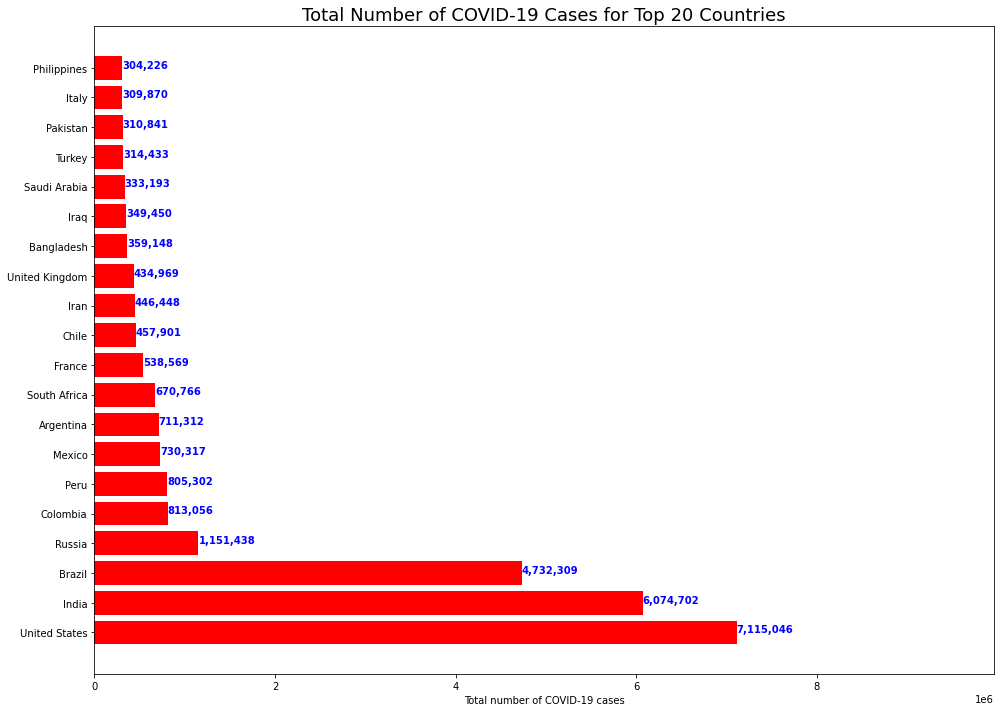

In [38]:
# Plot total number of COVID-19 cases in top 20 countries 
#  Compare: total_cases and population
#
# sorting data by top 20 countries that has highest # of cases 
#sorted_by_total_cases = covid_data_clean_df_analysis.sort_values(by=['total_cases'], inplace=True, ascending=False)

# get the data for plotting 
# get the data for plotting the top 20

top_20_covid_data_to_plot_df = covid_data_clean_df_analysis[:20][['location','total_cases',
                                                   'total_deaths','population']].reset_index()

total_cases_value = top_20_covid_data_to_plot_df.total_cases
x_title_labels = top_20_covid_data_to_plot_df.location

y_total_cases = np.arange(len(x_title_labels))

plt.figure(figsize=(14,10))
plt.barh(y_total_cases, total_cases_value, align='center', height=0.8, color="red")

plt.yticks(y_total_cases, x_title_labels)
plt.xlim(0,np.max(total_cases_value)*1.4)
plt.xlabel('Total number of COVID-19 cases')
plt.title('Total Number of COVID-19 Cases for Top 20 Countries', fontsize = 18)

for i, v in enumerate(total_cases_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_20_Countries-COVID-19-total-Cases.png")

plt.show()


<ipython-input-39-4472f359e4e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_clean_df_analysis.sort_values(by=['total_deaths'], inplace=True, ascending=False )


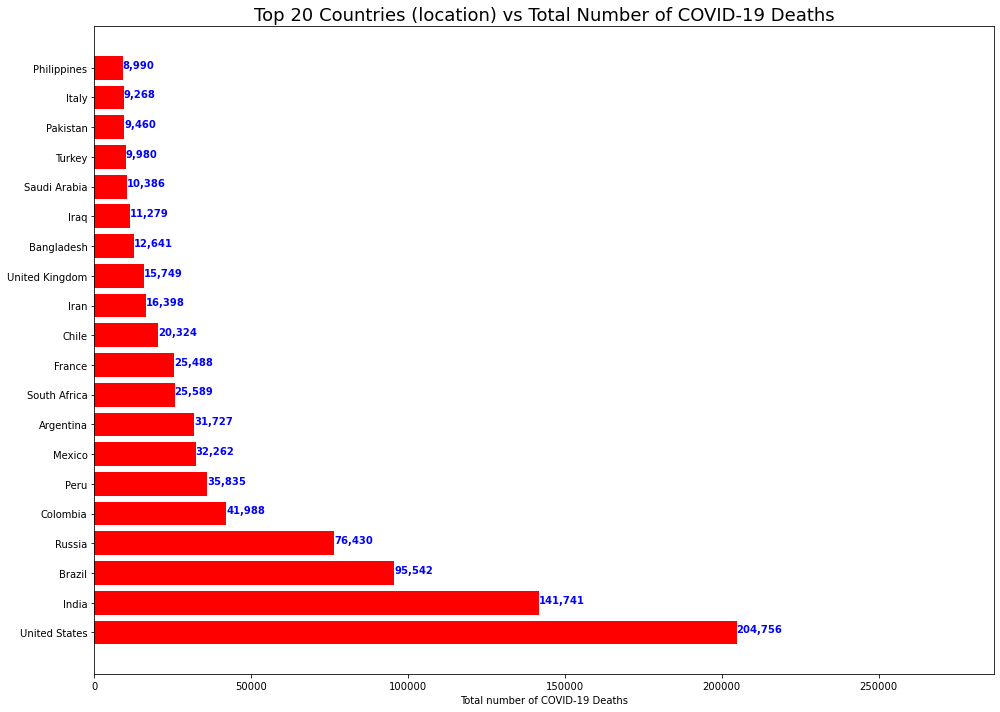

In [39]:
# Plot total number of COVID-19 deaths in top 20 countries 
#

covid_data_clean_df_analysis.sort_values(by=['total_deaths'], inplace=True, ascending=False )

top_20_covid_data_to_plot_df = covid_data_clean_df_analysis[:20][['location','total_cases',
                                                   'total_deaths','population']].reset_index()


total_death_value = top_20_covid_data_to_plot_df.total_deaths
x_title_labels_death = top_20_covid_data_to_plot_df.location

y_total_death = np.arange(len(x_title_labels_death))

plt.figure(figsize=(14,10))
plt.barh(y_total_death, total_death_value, align='center', height=0.8, color="red")

plt.yticks(y_total_death, x_title_labels)
plt.xlim(0,np.max(total_death_value)*1.4)
plt.xlabel('Total number of COVID-19 Deaths')
plt.title('Top 20 Countries (location) vs Total Number of COVID-19 Deaths', fontsize = 18)

for i, v in enumerate(total_death_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_20_Countries-COVID-19-Total-Deaths.png")

plt.show()

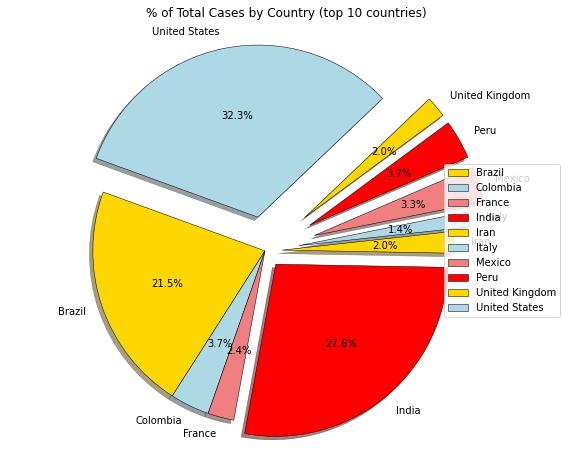

In [40]:
# Pie graph showing % of COVID-19 Cases per country
#
top_10_covid_data_to_plot_df = covid_data_clean_df_analysis[:10][['location','total_cases',
                                                   'total_deaths','population']].reset_index()

cases_count_sum = top_10_covid_data_to_plot_df.groupby('location').sum()["total_cases"]

labels = cases_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.3, 0.3, 0.2)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Cases by Country (top 10 countries)')
plt.axis('equal')

plt.pie(cases_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="right")

# Save it
plt.savefig("Percent-of-Total-COVID-19-Cases-by-Country-top-10-countries.png")

plt.show()




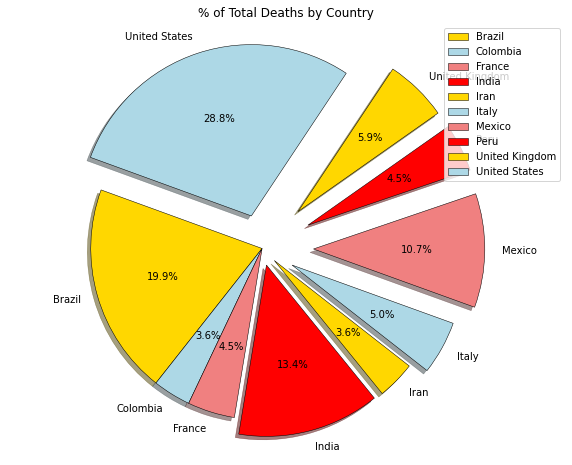

In [41]:
# Pie graph showing % of COVID-19 death per continent
#
deaths_count_sum = top_10_covid_data_to_plot_df.groupby('location').sum()["total_deaths"]

labels = deaths_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.3, 0.3, 0.2)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Deaths by Country')
plt.axis('equal')

plt.pie(deaths_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="best")

# Save it
plt.savefig("Percent-of-Total-Deaths-by-Country-top-10-countries.png")


plt.show()


In [42]:
# Function to creating linear regression and scatter plot
# Linear regression func
#
def linear_regress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Fuction for annotating plot
#
def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")
    

The r-squared is : -0.02


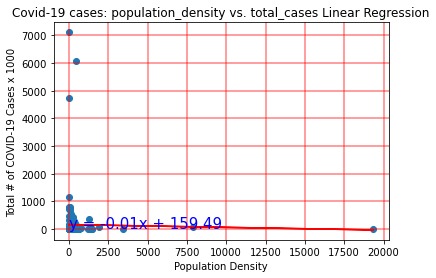

In [46]:
# Correlation of # covid-19 total cases with Population density
# Call function 
get_regress = linear_regress(covid_data_clean_df_analysis["population_density"], 
                             covid_data_clean_df_analysis["total_cases"]/1000)

# Call annotate func
annotate_plt(get_regress, 30, 20)

# Set a title
plt.title("Covid-19 cases: population_density vs. total_cases Linear Regression")

# Set xlabel
plt.xlabel("Population Density")

# Set ylabel
plt.ylabel("Total # of COVID-19 Cases x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cases-populatin-density-vs-total_cases-LinearRegression.png")


In [ ]:
# 
# Correlation of # covid-19 total cases with diabetes_prevalence ...
# Call function 
get_regress = linear_regress(covid_data_clean_df_analysis["diabetes_prevalence"], 
                             covid_data_clean_df_analysis["total_cases"]/1000)

# Call annotate func
annotate_plt(get_regress, 30, 20)

# Set a title
plt.title("Covid-19 cases: diabetes_prevalence vs. total_cases Linear Regression")

# Set xlabel
plt.xlabel("Diabetes Prevalence")

# Set ylabel
plt.ylabel("Total # of COVID-19 Cases x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cases-diabetes_prevalence-vs-total_cases-LinearRegression.png")


In [ ]:

# Correlation of # of covid-19 death with cardiovasc_death_rate
# Call function 
get_regress = linear_regress(covid_data_clean_df_analysis["cardiovasc_death_rate"], 
                             covid_data_clean_df_analysis["total_deaths"]/1000)


# Call annotate func
annotate_plt(get_regress, 20, 10)

# Set a title
plt.title("Covid-19 Deaths: cardiovasc_death_rate vs.Total Deaths: Linear Regression")

# Set xlabel
plt.xlabel("Cardiovasc Death Rate")

# Set ylabel
plt.ylabel("Total # of Deathx 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cardiovasc_death_rate-VS-COVID-total_Death-LinearRegression.png")


The r-squared is : 0.08


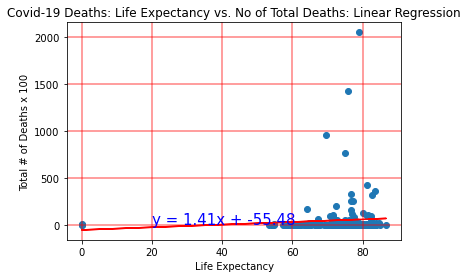

In [44]:
#
# Correlation of # of covid-19 death with life_expectancy
# Call function 
get_regress = linear_regress(covid_data_clean_df_analysis["life_expectancy"], 
                             covid_data_clean_df_analysis["total_deaths"]/100)


# Call annotate func
annotate_plt(get_regress, 20, 10)

# Set a title
plt.title("Covid-19 Deaths: Life Expectancy vs. No of Total Deaths: Linear Regression")

# Set xlabel
plt.xlabel("Life Expectancy")

# Set ylabel
plt.ylabel("Total # of Deaths x 100")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-life_expectancy-VS-COVID-19-total_deaths-LinearRegression.png")



In [45]:
#How many hospital beds per thousand available for each continent? 
#create graph 

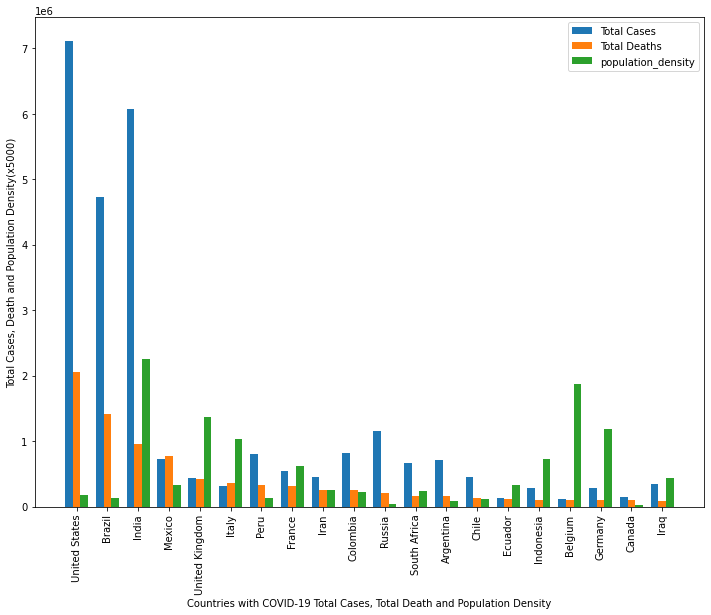

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot Compare: By country 
#  total number of COVID-19 cases, deaths and population
#
# get the data for plotting 
# get the data for plotting the top 20

top_20_covid_data_to_plot_df = covid_data_clean_df_analysis[:20][['location','total_cases',
                                                   'total_deaths','population', 
                                                    'population_density']].reset_index()

# get total # for each country
#
total_cases_value = top_20_covid_data_to_plot_df.total_cases
total_death_value = top_20_covid_data_to_plot_df.total_deaths
total_population_value = top_20_covid_data_to_plot_df.population
total_population_density_value = top_20_covid_data_to_plot_df.population_density


# Get country value
#
countries = top_20_covid_data_to_plot_df['location'].values

x = np.arange(len(countries))
w = 0.25

# Plot attributes
#
plt.figure(figsize=(12,9))

rects1 = plt.bar(x-w, total_cases_value, width=w, label='Total Cases')
rects2 = plt.bar(x, total_death_value*10, width=w, label='Total Deaths')
#rects3 = plt.bar(x+w, total_population_value, width=w, label='population')
rects4 = plt.bar(x+w, total_population_density_value*5000, width=w, label='population_density')

# plt.plot(x, df['Target'].values, lw=2, label='Target')

plt.xticks(x, countries, rotation=90)

#plt.ylim([0,1000000])


plt.xlabel('Countries with COVID-19 Total Cases, Total Death and Population Density')
plt.ylabel('Total Cases, Death and Population Density(x5000)')

plt.legend(loc="best")

#fig.tight_layout()

plt.show()

# Save it
plt.savefig("To_20_Countries-COVID-19-compare.png")




In [21]:
top_20_covid_data_to_plot_df.head(20)


,index,location,total_cases,total_deaths,population,population_density
0,194,United States,7115046,204756,331002647,35.608
1,27,Brazil,4732309,141741,212559409,25.040
2,89,India,6074702,95542,1380004385,450.419
3,123,Mexico,730317,76430,128932753,66.444
4,68,United Kingdom,434969,41988,67886004,272.898
5,95,Italy,309870,35835,60461828,205.859
6,149,Peru,805302,32262,32971846,25.129
7,65,France,538569,31727,65273512,122.578
8,91,Iran,446448,25589,83992953,49.831
9,41,Colombia,813056,25488,50882884,44.223


In [22]:
#
# Sophia: Dispaly Hit Map
# 
